In [ ]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


In [ ]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 6.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
pip install lightgbm

In [ ]:
pip install bayesian-optimization

In [ ]:
pip install tabulate

In [ ]:
!pip install hyperopt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from tabulate import tabulate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical,Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from bayes_opt import BayesianOptimization
from sklearn.metrics import r2_score
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heartDT_Filtered.csv to heartDT_Filtered.csv


In [ ]:
df_heart=pd.read_csv('/content/heartDT_Filtered.csv')


In [ ]:
df_heart.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,21.967120,0
1,55,1,156,85.0,140,90,3,1,0,0,1,34.927679,1
2,52,1,165,64.0,130,70,3,1,0,0,0,23.507805,1
3,48,2,169,82.0,150,100,1,1,0,0,1,28.710479,1
4,48,1,156,56.0,100,60,1,1,0,0,0,23.011177,0


In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65381 entries, 0 to 65380
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          65381 non-null  int64  
 1   gender       65381 non-null  int64  
 2   height       65381 non-null  int64  
 3   weight       65381 non-null  float64
 4   ap_hi        65381 non-null  int64  
 5   ap_lo        65381 non-null  int64  
 6   cholesterol  65381 non-null  int64  
 7   gluc         65381 non-null  int64  
 8   smoke        65381 non-null  int64  
 9   alco         65381 non-null  int64  
 10  active       65381 non-null  int64  
 11  BMI          65381 non-null  float64
 12  cardio       65381 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 6.5 MB


In [ ]:
df_heart

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,21.967120,0
1,55,1,156,85.0,140,90,3,1,0,0,1,34.927679,1
2,52,1,165,64.0,130,70,3,1,0,0,0,23.507805,1
3,48,2,169,82.0,150,100,1,1,0,0,1,28.710479,1
4,48,1,156,56.0,100,60,1,1,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65376,53,2,168,76.0,120,80,1,1,1,0,1,26.927438,0
65377,62,1,158,126.0,140,90,2,2,0,0,1,50.472681,1
65378,52,2,183,105.0,180,90,3,1,0,1,0,31.353579,1
65379,61,1,163,72.0,135,80,1,2,0,0,0,27.099251,1


In [ ]:
X=df_heart.drop(['cardio'],axis=1)
y=df_heart['cardio']

Import Libraties

Split DataSet

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Scalling

In [ ]:
scaler = StandardScaler()
X_train_scalled=scaler.fit_transform(X_train)
X_test_scalled=scaler.transform(X_test)

Model Training

In [ ]:
dict_model_score_train={}
dict_model_score_test={}
dict_acc_score={}
dict_percision_score={}
dict_recall_score={}
dict_f1_score={}


In [ ]:
Train_Score={}
Test_Score={}
Accuracy_Score={}
Percision_Score={}
Recall_Score={}
F_Score={}




1.   Logistic Regression





In [ ]:
model = LogisticRegression(max_iter=10000)

In [ ]:
param_spaces = [
    {'C': Real(1e-6, 1e+6, prior='log-uniform'), 'penalty': Categorical(['l2', 'none']), 'solver': Categorical(['newton-cg', 'lbfgs', 'sag'])},
    {'C': Real(1e-6, 1e+6, prior='log-uniform'), 'penalty': Categorical(['l1', 'l2']), 'solver': Categorical(['liblinear'])},
    {'C': Real(1e-6, 1e+6, prior='log-uniform'), 'penalty': Categorical(['elasticnet']), 'solver': Categorical(['saga']), 'l1_ratio': Real(0, 1)},
    {'C': Real(1e-6, 1e+6, prior='log-uniform'), 'penalty': Categorical(['l2']), 'solver': Categorical(['saga'])}
]

In [ ]:
opt = BayesSearchCV(
    estimator=model,
    search_spaces=param_spaces,
    n_iter=32,
    cv=5,
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
    optimizer_kwargs={'base_estimator': 'GP'}  # Specify Gaussian Process as the base estimator
)

In [ ]:
opt.fit(X_train_scalled, y_train)

BayesSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_iter=32,
              n_jobs=-1, optimizer_kwargs={'base_estimator': 'GP'},
              random_state=42,
              search_spaces=[{'C': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize'),
                              'penalty': Categorical(categories=('l2', 'none'), prior=None),
                              'solver': Categorical(categories=('newton-cg', 'lbfgs', 'sag...
                              'l1_ratio': Real(low=0, high=1, prior='uniform', transform='normalize'),
                              'penalty': Categorical(categories=('elasticnet',), prior=None),
                              'solver': Categorical(categories=('saga',), prior=None)},
                             {'C': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize'),
                              'penalty': Categorical(categories=('l2',), prior=None),
                              'solver': Categorical(categories=('saga',), prior=None)}])

In [ ]:
print("Best Parameter Set:", opt.best_params_)

Best Parameter Set: OrderedDict([('C', 0.01849646832713949), ('penalty', 'l2'), ('solver', 'lbfgs')])


In [ ]:
best_parameters = opt.best_params_

In [ ]:
best_model = LogisticRegression(
    C=best_parameters['C'],
    penalty=best_parameters['penalty'],
    solver=best_parameters['solver'],
    max_iter=10000
)

In [ ]:
best_model.fit(X_train_scalled, y_train)

LogisticRegression(C=0.01849646832713949, max_iter=10000)

In [ ]:
y_pred = best_model.predict(X_test_scalled)


Performance Metrics
+-------------------+-----------+
|      Metric       | Score (%) |
+-------------------+-----------+
| Model Train Score |   72.76   |
| Model Test Score  |   72.32   |
|  Accuracy Score   |   72.32   |
|  Percision Score  |   72.5    |
|   Recall Score    |   72.32   |
|      F_Score      |   72.2    |
+-------------------+-----------+

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6707
           1       0.74      0.66      0.70      6370

    accuracy                           0.72     13077
   macro avg       0.73      0.72      0.72     13077
weighted avg       0.73      0.72      0.72     13077



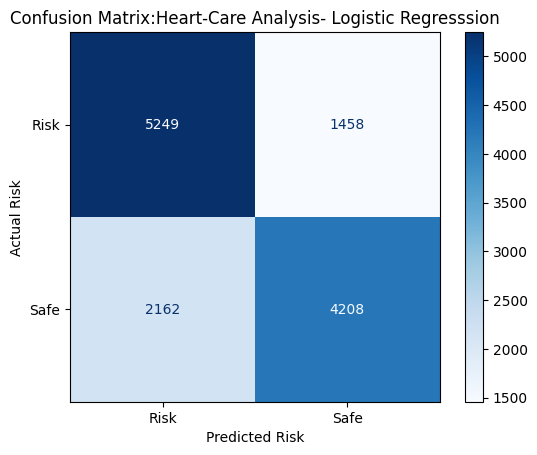

In [ ]:
def checkAccuracy(y_pred,y_test):
  print('Performance Metrics')
  acc_score=accuracy_score(y_test,y_pred)

  pre_Score=precision_score(y_test,y_pred,average='weighted')

  rec_score=recall_score(y_test,y_pred,average='weighted')

  f_score=f1_score(y_test,y_pred,average='weighted')

  model_score_test = round(best_model.score(X_test_scalled, y_test) * 100, 2)
  model_score_train = round(best_model.score(X_train_scalled, y_train) * 100, 2)




  # add in to the dictionary
  m_table=[["Model Train Score",model_score_train],["Model Test Score",model_score_test],["Accuracy Score",round(acc_score*100,2)],["Percision Score",round(pre_Score*100,2)],["Recall Score",round(rec_score*100,2)],["F_Score          ",round(f_score*100,2)]]
  print(tabulate(m_table, headers=["Metric", "Score (%)"], tablefmt="pretty"))
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))
  dict_model_score_train['LR']=model_score_train
  dict_model_score_test['LR']=model_score_test
  dict_acc_score["LR"]=round(acc_score*100,2)
  dict_percision_score['LR']=round(pre_Score*100,2)
  dict_recall_score['LR']=round(rec_score*100,2)
  dict_f1_score['LR']=round(f_score*100,2)

  #confusion matrix
  cm=confusion_matrix(y_test,y_pred)
  display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Risk','Safe'])
  display.plot(cmap=plt.cm.Blues)
  plt.title('Confusion Matrix:Heart-Care Analysis- Logistic Regresssion')
  plt.xlabel('Predicted Risk')
  plt.ylabel('Actual Risk')
  plt.show()
checkAccuracy(y_pred,y_test)

Insert into Result Dictionary

In [ ]:
Train_Score["LR"] = 72.76
Test_Score["LR"] = 72.33
Accuracy_Score["LR"]=72.33
Percision_Score["LR"] = 72.51
Recall_Score["LR"] = 72.33
F_Score["LR"] = 72.21



# 2.  K-Nearest Neighbors (KNN) - Hyper Parameter Optimization

In [ ]:
modelKNN = KNeighborsClassifier()

parameter_List={'n_neighbors': Integer(1, 30),
'weights': Categorical(['uniform', 'distance']),
'metric': Categorical(['euclidean', 'manhattan', 'minkowski'])}


In [ ]:
optimizer=BayesSearchCV(modelKNN,parameter_List,n_iter=30,cv=5,random_state=42,n_jobs=-1)

In [ ]:
optimizer.fit(X_train_scalled, y_train)

BayesSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=30, n_jobs=-1,
              random_state=42,
              search_spaces={'metric': Categorical(categories=('euclidean', 'manhattan', 'minkowski'), prior=None),
                             'n_neighbors': Integer(low=1, high=30, prior='uniform', transform='normalize'),
                             'weights': Categorical(categories=('uniform', 'distance'), prior=None)})

In [ ]:
print("Best hyperparameters:", optimizer.best_params_)

Best hyperparameters: OrderedDict([('metric', 'manhattan'), ('n_neighbors', 30), ('weights', 'uniform')])


In [ ]:
best_params_KNN = optimizer.best_params_

In [ ]:
best_model_KNN = KNeighborsClassifier(
    n_neighbors=best_params_KNN['n_neighbors'],
    weights=best_params_KNN['weights'],
    metric=best_params_KNN['metric']
)

In [ ]:
best_model_KNN.fit(X_train_scalled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=30)

In [ ]:
y_pred = best_model_KNN.predict(X_test_scalled)

Performance Metrics
+-------------------+-----------+
|      Metric       | Score (%) |
+-------------------+-----------+
| Model Train Score |   74.09   |
| Model Test Score  |   71.67   |
|  Accuracy Score   |   71.67   |
|  Percision Score  |   71.86   |
|   Recall Score    |   71.67   |
|      F_Score      |   71.54   |
+-------------------+-----------+

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6707
           1       0.74      0.65      0.69      6370

    accuracy                           0.72     13077
   macro avg       0.72      0.72      0.71     13077
weighted avg       0.72      0.72      0.72     13077



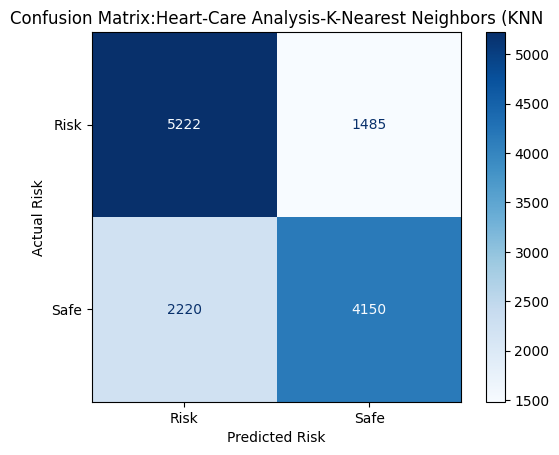

In [ ]:
def checkAccuracy(y_pred,y_test):
  print('Performance Metrics')
  acc_score=accuracy_score(y_test,y_pred)

  pre_Score=precision_score(y_test,y_pred,average='weighted')

  rec_score=recall_score(y_test,y_pred,average='weighted')

  f_score=f1_score(y_test,y_pred,average='weighted')

  model_score_test = round(best_model_KNN.score(X_test_scalled, y_test) * 100, 2)
  model_score_train = round(best_model_KNN.score(X_train_scalled, y_train) * 100, 2)




  # add in to the dictionary
  m_table=[["Model Train Score",model_score_train],["Model Test Score",model_score_test],["Accuracy Score",round(acc_score*100,2)],["Percision Score",round(pre_Score*100,2)],["Recall Score",round(rec_score*100,2)],["F_Score          ",round(f_score*100,2)]]
  print(tabulate(m_table, headers=["Metric", "Score (%)"], tablefmt="pretty"))
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))
  dict_model_score_train['KNN']=model_score_train
  dict_model_score_test['KNN']=model_score_test
  dict_acc_score["KNN"]=round(acc_score*100,2)
  dict_percision_score['KNN']=round(pre_Score*100,2)
  dict_recall_score['KNN']=round(rec_score*100,2)
  dict_f1_score['KNN']=round(f_score*100,2)

  #confusion matrix
  cm=confusion_matrix(y_test,y_pred)
  display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Risk','Safe'])
  display.plot(cmap=plt.cm.Blues)
  plt.title('Confusion Matrix:Heart-Care Analysis-K-Nearest Neighbors (KNN')
  plt.xlabel('Predicted Risk')
  plt.ylabel('Actual Risk')
  plt.show()
checkAccuracy(y_pred,y_test)

In [ ]:
Train_Score["KNN"] = 74.09
Test_Score["KNN"] = 71.67
Accuracy_Score["KNN"]=71.67
Percision_Score["KNN"] = 71.86
Recall_Score["KNN"] = 71.67
F_Score["KNN"] = 71.54


# Random Forest Classifier [RF]

In [ ]:
model_RF = RandomForestClassifier()

In [ ]:
param_space_RF = {
    'n_estimators': Integer(10, 200),
    'max_depth': Integer(1, 30),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'max_features': Categorical(['sqrt', 'log2']),
    'bootstrap': Categorical([True, False])
}

In [ ]:
optimizer_RF = BayesSearchCV(
    estimator=model_RF,
    search_spaces=param_space_RF,
    n_iter=32,
    cv=5,
    random_state=42,
    n_jobs=-1
)

In [ ]:
optimizer_RF.fit(X_train_scalled, y_train)


BayesSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=32, n_jobs=-1,
              random_state=42,
              search_spaces={'bootstrap': Categorical(categories=(True, False), prior=None),
                             'max_depth': Integer(low=1, high=30, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('sqrt', 'log2'), prior=None),
                             'min_samples_leaf': Integer(low=1, high=20, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize')})

In [ ]:
print("Best hyperparameters_RF:", optimizer_RF.best_params_)

Best hyperparameters_RF: OrderedDict([('bootstrap', True), ('max_depth', 26), ('max_features', 'log2'), ('min_samples_leaf', 17), ('min_samples_split', 2), ('n_estimators', 200)])


In [ ]:
best_params_RF = optimizer_RF.best_params_

In [ ]:
print(best_params_RF)

OrderedDict([('bootstrap', True), ('max_depth', 26), ('max_features', 'log2'), ('min_samples_leaf', 17), ('min_samples_split', 2), ('n_estimators', 200)])


In [ ]:
best_model_RF = RandomForestClassifier(
    n_estimators=best_params_RF['n_estimators'],
    max_depth=best_params_RF['max_depth'],
    min_samples_split=best_params_RF['min_samples_split'],
    min_samples_leaf=best_params_RF['min_samples_leaf'],
    max_features=best_params_RF['max_features'],
    bootstrap=best_params_RF['bootstrap']
)

In [ ]:
best_model_RF.fit(X_train_scalled, y_train)


RandomForestClassifier(max_depth=26, max_features='log2', min_samples_leaf=17,
                       n_estimators=200)

In [ ]:
y_pred = best_model_RF.predict(X_test_scalled)

Performance Metrics
+-------------------+-----------+
|      Metric       | Score (%) |
+-------------------+-----------+
| Model Train Score |   75.85   |
| Model Test Score  |   73.07   |
|  Accuracy Score   |   73.07   |
|  Percision Score  |   73.13   |
|   Recall Score    |   73.07   |
|      F_Score      |   73.02   |
+-------------------+-----------+

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6707
           1       0.74      0.69      0.71      6370

    accuracy                           0.73     13077
   macro avg       0.73      0.73      0.73     13077
weighted avg       0.73      0.73      0.73     13077



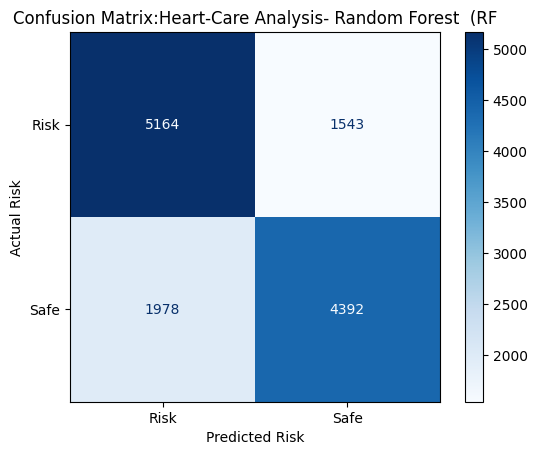

In [ ]:
def checkAccuracy(y_pred,y_test):
  print('Performance Metrics')
  acc_score=accuracy_score(y_test,y_pred)

  pre_Score=precision_score(y_test,y_pred,average='weighted')

  rec_score=recall_score(y_test,y_pred,average='weighted')

  f_score=f1_score(y_test,y_pred,average='weighted')

  model_score_test = round(best_model_RF.score(X_test_scalled, y_test) * 100, 2)
  model_score_train = round(best_model_RF.score(X_train_scalled, y_train) * 100, 2)




  # add in to the dictionary
  m_table=[["Model Train Score",model_score_train],["Model Test Score",model_score_test],["Accuracy Score",round(acc_score*100,2)],["Percision Score",round(pre_Score*100,2)],["Recall Score",round(rec_score*100,2)],["F_Score          ",round(f_score*100,2)]]
  print(tabulate(m_table, headers=["Metric", "Score (%)"], tablefmt="pretty"))
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))
  dict_model_score_train['RF']=model_score_train
  dict_model_score_test['RF']=model_score_test
  dict_acc_score["RF"]=round(acc_score*100,2)
  dict_percision_score['RF']=round(pre_Score*100,2)
  dict_recall_score['RF']=round(rec_score*100,2)
  dict_f1_score['RF']=round(f_score*100,2)

  #confusion matrix
  cm=confusion_matrix(y_test,y_pred)
  display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Risk','Safe'])
  display.plot(cmap=plt.cm.Blues)
  plt.title('Confusion Matrix:Heart-Care Analysis- Random Forest  (RF')
  plt.xlabel('Predicted Risk')
  plt.ylabel('Actual Risk')
  plt.show()
checkAccuracy(y_pred,y_test)

In [ ]:
Train_Score["RF"] = 75.85
Test_Score["RF"] = 73.29
Accuracy_Score["RF"]=73.29
Percision_Score["RF"] = 73.22
Recall_Score["RF"] =73.04
F_Score["RF"] = 73.21

# Support Vector Machine (SVM)

In [ ]:
model_svc = SVC()

In [ ]:
param_list_svc = {
    'C': Real(1e-6, 1e+2, prior='log-uniform'),
    'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
    'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
     'degree': Integer(2, 5),
    'coef0': Real(0, 10),
}


In [ ]:
optimizer_SVC= BayesSearchCV(
    estimator=model_svc,
    search_spaces=param_list_svc,
    n_iter=8,
    cv=3,
    random_state=42,
    n_jobs=-1
)

In [ ]:
optimizer_SVC.fit(X_train_scalled, y_train)

BayesSearchCV(cv=3, estimator=SVC(), n_iter=8, n_jobs=-1, random_state=42,
              search_spaces={'C': Real(low=1e-06, high=100.0, prior='log-uniform', transform='normalize'),
                             'coef0': Real(low=0, high=10, prior='uniform', transform='normalize'),
                             'degree': Integer(low=2, high=5, prior='uniform', transform='normalize'),
                             'gamma': Real(low=1e-06, high=10.0, prior='log-uniform', transform='normalize'),
                             'kernel': Categorical(categories=('linear', 'poly', 'rbf', 'sigmoid'), prior=None)})

In [ ]:
print("Best hyperparameters For SVC:", optimizer_SVC.best_params_)



Best hyperparameters For SVC: OrderedDict([('C', 0.022244596968016832), ('coef0', 9.200092264373165), ('degree', 3), ('gamma', 0.7304576797154569), ('kernel', 'poly')])


In [ ]:
best_params_svc = optimizer_SVC.best_params_

In [ ]:
best_model_svc = SVC(
    C=best_params_svc['C'],
    gamma=best_params_svc['gamma'],
    kernel=best_params_svc['kernel'],
    degree=best_params_svc.get('degree', 3),
    coef0=best_params_svc.get('coef0', 0)
)


In [ ]:
best_model_svc.fit(X_train_scalled, y_train)

SVC(C=0.022244596968016832, coef0=9.200092264373165, gamma=0.7304576797154569,
    kernel='poly')

In [ ]:
y_pred = best_model_svc.predict(X_test_scalled)

Performance Metrics
+-------------------+-----------+
|      Metric       | Score (%) |
+-------------------+-----------+
| Model Train Score |   73.42   |
| Model Test Score  |   73.0    |
|  Accuracy Score   |   73.0    |
|  Percision Score  |   73.3    |
|   Recall Score    |   73.0    |
|      F_Score      |   72.84   |
+-------------------+-----------+

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6707
           1       0.76      0.66      0.70      6370

    accuracy                           0.73     13077
   macro avg       0.73      0.73      0.73     13077
weighted avg       0.73      0.73      0.73     13077



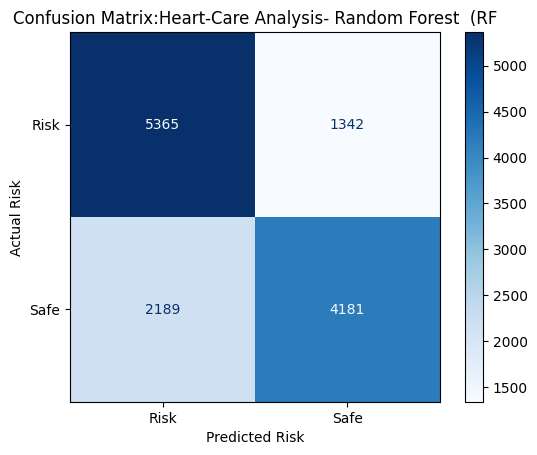

In [ ]:
def checkAccuracy(y_pred,y_test):
  print('Performance Metrics')
  acc_score=accuracy_score(y_test,y_pred)

  pre_Score=precision_score(y_test,y_pred,average='weighted')

  rec_score=recall_score(y_test,y_pred,average='weighted')

  f_score=f1_score(y_test,y_pred,average='weighted')

  model_score_test = round(best_model_svc.score(X_test_scalled, y_test) * 100, 2)
  model_score_train = round(best_model_svc.score(X_train_scalled, y_train) * 100, 2)




  # add in to the dictionary
  m_table=[["Model Train Score",model_score_train],["Model Test Score",model_score_test],["Accuracy Score",round(acc_score*100,2)],["Percision Score",round(pre_Score*100,2)],["Recall Score",round(rec_score*100,2)],["F_Score          ",round(f_score*100,2)]]
  print(tabulate(m_table, headers=["Metric", "Score (%)"], tablefmt="pretty"))
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))
  dict_model_score_train['SVC']=model_score_train
  dict_model_score_test['SVC']=model_score_test
  dict_acc_score["SVC"]=round(acc_score*100,2)
  dict_percision_score['SVC']=round(pre_Score*100,2)
  dict_recall_score['SVC']=round(rec_score*100,2)
  dict_f1_score['SVC']=round(f_score*100,2)

  #confusion matrix
  cm=confusion_matrix(y_test,y_pred)
  display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Risk','Safe'])
  display.plot(cmap=plt.cm.Blues)
  plt.title('Confusion Matrix:Heart-Care Analysis- Random Forest  (RF')
  plt.xlabel('Predicted Risk')
  plt.ylabel('Actual Risk')
  plt.show()
checkAccuracy(y_pred,y_test)

In [ ]:
Train_Score["SVM"] =73.42
Test_Score["SVM"] = 73.0
Accuracy_Score["SVM"]=73.0
Percision_Score["SVM"] =73.3
Recall_Score["SVM"] =73.0
F_Score["SVM"] = 72.84

Naive Bayes Classifiers

In [ ]:
model_NB = GaussianNB()

In [ ]:
param_list_NB = {
    'var_smoothing': Real(1e-12, 1e-9, prior='log-uniform')
}


In [ ]:
optimzer_NB = BayesSearchCV(
    estimator=model_NB,
    search_spaces=param_list_NB,
    n_iter=32,
    cv=5,
    random_state=42,
    n_jobs=-1
)

In [ ]:
optimzer_NB.fit(X_train_scalled, y_train)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.2211317477760924e-10] before, using random point [5.607018124300146e-11]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.6254852006060726e-10] before, using random point [9.492748798592208e-12]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [4.6986981739027145e-12] before, using random point [3.674144150428177e-12]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [8.746942225411529e-10] before, using random point [4.5510878249502197e-10]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been ev

BayesSearchCV(cv=5, estimator=GaussianNB(), n_iter=32, n_jobs=-1,
              random_state=42,
              search_spaces={'var_smoothing': Real(low=1e-12, high=1e-09, prior='log-uniform', transform='normalize')})

In [ ]:
print("Best hyperparameters for NB:", optimzer_NB.best_params_)

Best hyperparameters for NB: OrderedDict([('var_smoothing', 1.6994636371262762e-11)])


In [ ]:
best_params_NB = optimzer_NB.best_params_

In [ ]:
best_model_NB = GaussianNB(var_smoothing=best_params_NB['var_smoothing'])

In [ ]:
best_model_NB.fit(X_train_scalled, y_train)

GaussianNB(var_smoothing=1.6994636371262762e-11)

In [ ]:
y_pred = best_model_NB.predict(X_test_scalled)

Performance Metrics
+-------------------+-----------+
|      Metric       | Score (%) |
+-------------------+-----------+
| Model Train Score |   71.04   |
| Model Test Score  |   71.03   |
|  Accuracy Score   |   71.03   |
|  Percision Score  |   71.5    |
|   Recall Score    |   71.03   |
|      F_Score      |   70.77   |
+-------------------+-----------+

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      6707
           1       0.74      0.62      0.68      6370

    accuracy                           0.71     13077
   macro avg       0.72      0.71      0.71     13077
weighted avg       0.72      0.71      0.71     13077



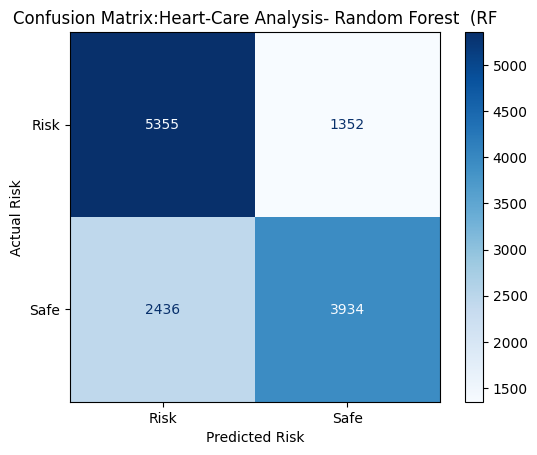

In [ ]:
def checkAccuracy(y_pred,y_test):
  print('Performance Metrics')
  acc_score=accuracy_score(y_test,y_pred)

  pre_Score=precision_score(y_test,y_pred,average='weighted')

  rec_score=recall_score(y_test,y_pred,average='weighted')

  f_score=f1_score(y_test,y_pred,average='weighted')

  model_score_test = round(best_model_NB.score(X_test_scalled, y_test) * 100, 2)
  model_score_train = round(best_model_NB.score(X_train_scalled, y_train) * 100, 2)




  # add in to the dictionary
  m_table=[["Model Train Score",model_score_train],["Model Test Score",model_score_test],["Accuracy Score",round(acc_score*100,2)],["Percision Score",round(pre_Score*100,2)],["Recall Score",round(rec_score*100,2)],["F_Score          ",round(f_score*100,2)]]
  print(tabulate(m_table, headers=["Metric", "Score (%)"], tablefmt="pretty"))
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))
  dict_model_score_train['NB']=model_score_train
  dict_model_score_test['NB']=model_score_test
  dict_acc_score["NB"]=round(acc_score*100,2)
  dict_percision_score['NB']=round(pre_Score*100,2)
  dict_recall_score['NB']=round(rec_score*100,2)
  dict_f1_score['NB']=round(f_score*100,2)

  #confusion matrix
  cm=confusion_matrix(y_test,y_pred)
  display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Risk','Safe'])
  display.plot(cmap=plt.cm.Blues)
  plt.title('Confusion Matrix:Heart-Care Analysis- Random Forest  (RF')
  plt.xlabel('Predicted Risk')
  plt.ylabel('Actual Risk')
  plt.show()
checkAccuracy(y_pred,y_test)

In [ ]:
Train_Score["NB"] = 71.04
Test_Score["NB"] =  71.03
Accuracy_Score["NB"]= 71.03
Percision_Score["NB"] = 71.5
Recall_Score["NB"] =71.03
F_Score["NB"] = 70.77

# Decision Tree Classifier

In [ ]:
model_DT = DecisionTreeClassifier()

In [ ]:
param_list_DT = {
    'max_depth': Integer(1, 30),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'criterion': Categorical(['gini', 'entropy']),
}

In [ ]:
optimizer_DT = BayesSearchCV(
    estimator=model_DT,
    search_spaces=param_list_DT,
    n_iter=32,
    cv=5,
    random_state=42,
    n_jobs=-1
)


In [ ]:
optimizer_DT.fit(X_train_scalled, y_train)

BayesSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=32, n_jobs=-1,
              random_state=42,
              search_spaces={'criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'max_depth': Integer(low=1, high=30, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=20, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize')})

In [ ]:
print("Best hyperparameters for DT:", optimizer_DT.best_params_)

Best hyperparameters for DT: OrderedDict([('criterion', 'entropy'), ('max_depth', 6), ('min_samples_leaf', 1), ('min_samples_split', 2)])


In [ ]:
best_params_DT = optimizer_DT.best_params_

In [ ]:
best_model_DT = DecisionTreeClassifier(
    max_depth=best_params_DT['max_depth'],
    min_samples_split=best_params_DT['min_samples_split'],
    min_samples_leaf=best_params_DT['min_samples_leaf'],
    criterion=best_params_DT['criterion']
)

In [ ]:
best_model_DT.fit(X_train_scalled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [ ]:
y_pred = best_model_DT.predict(X_test_scalled)

Performance Metrics
+-------------------+-----------+
|      Metric       | Score (%) |
+-------------------+-----------+
| Model Train Score |   73.27   |
| Model Test Score  |   72.67   |
|  Accuracy Score   |   72.67   |
|  Percision Score  |   72.79   |
|   Recall Score    |   72.67   |
|      F_Score      |   72.58   |
+-------------------+-----------+

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6707
           1       0.74      0.67      0.71      6370

    accuracy                           0.73     13077
   macro avg       0.73      0.73      0.73     13077
weighted avg       0.73      0.73      0.73     13077



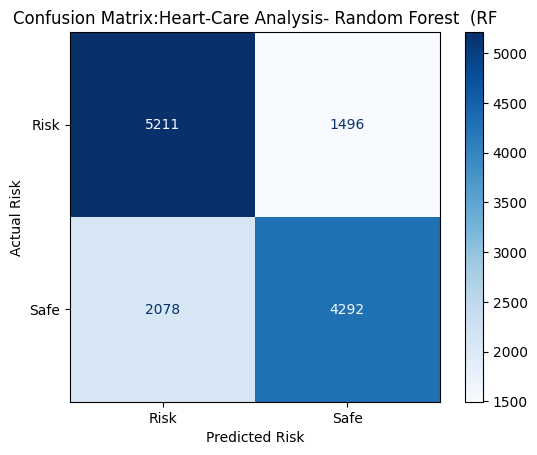

In [ ]:
def checkAccuracy(y_pred,y_test):
  print('Performance Metrics')
  acc_score=accuracy_score(y_test,y_pred)

  pre_Score=precision_score(y_test,y_pred,average='weighted')

  rec_score=recall_score(y_test,y_pred,average='weighted')

  f_score=f1_score(y_test,y_pred,average='weighted')

  model_score_test = round(best_model_DT.score(X_test_scalled, y_test) * 100, 2)
  model_score_train = round(best_model_DT.score(X_train_scalled, y_train) * 100, 2)




  # add in to the dictionary
  m_table=[["Model Train Score",model_score_train],["Model Test Score",model_score_test],["Accuracy Score",round(acc_score*100,2)],["Percision Score",round(pre_Score*100,2)],["Recall Score",round(rec_score*100,2)],["F_Score          ",round(f_score*100,2)]]
  print(tabulate(m_table, headers=["Metric", "Score (%)"], tablefmt="pretty"))
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))
  dict_model_score_train['DT']=model_score_train
  dict_model_score_test['DT']=model_score_test
  dict_acc_score["DT"]=round(acc_score*100,2)
  dict_percision_score['DT']=round(pre_Score*100,2)
  dict_recall_score['DT']=round(rec_score*100,2)
  dict_f1_score['DT']=round(f_score*100,2)

  #confusion matrix
  cm=confusion_matrix(y_test,y_pred)
  display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Risk','Safe'])
  display.plot(cmap=plt.cm.Blues)
  plt.title('Confusion Matrix:Heart-Care Analysis- Random Forest  (RF')
  plt.xlabel('Predicted Risk')
  plt.ylabel('Actual Risk')
  plt.show()
checkAccuracy(y_pred,y_test)

In [ ]:
Train_Score["DT"] = 73.27
Test_Score["DT"] =  72.67
Accuracy_Score["DT"]= 72.67
Percision_Score["DT"] = 72.79
Recall_Score["DT"] = 72.67
F_Score["DT"] = 72.58

# XGBoost Classifier

In [ ]:
param_space = {
    'n_estimators': Integer(50, 1000),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'max_depth': Integer(3, 10),
    'min_child_weight': Integer(1, 10),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0)
}

In [ ]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [ ]:
bayes_search = BayesSearchCV(
    estimator=xgb_clf,
    search_spaces=param_space,
    n_iter=32,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

In [ ]:
bayes_search.fit(X_train_scalled, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:29:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


BayesSearchCV(cv=3,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric='logloss', feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate...
                             'learning_rate': Real(low=0.01, high=0.3, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'min_child_weight': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=1000, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.6, high=1.0, prior='uniform', transform='normalize')},
              verbose=1)

In [ ]:
print(f"Best parameters: {bayes_search.best_params_}")
print(f"Best cross-validation score: {bayes_search.best_score_}")

Best parameters: OrderedDict([('colsample_bytree', 0.7644958421089374), ('learning_rate', 0.01), ('max_depth', 6), ('min_child_weight', 9), ('n_estimators', 930), ('subsample', 0.9862756211598556)])
Best cross-validation score: 0.7346664778710069


In [ ]:
best_model_XG = bayes_search.best_estimator_
y_pred = best_model_XG.predict(X_test_scalled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the best model: {accuracy:.2f}')

Accuracy of the best model: 0.73


Performance Metrics
+-------------------+-----------+
|      Metric       | Score (%) |
+-------------------+-----------+
| Model Train Score |   74.61   |
| Model Test Score  |   73.2    |
|  Accuracy Score   |   73.2    |
|  Percision Score  |   73.29   |
|   Recall Score    |   73.2    |
|      F_Score      |   73.14   |
+-------------------+-----------+

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6707
           1       0.74      0.69      0.71      6370

    accuracy                           0.73     13077
   macro avg       0.73      0.73      0.73     13077
weighted avg       0.73      0.73      0.73     13077



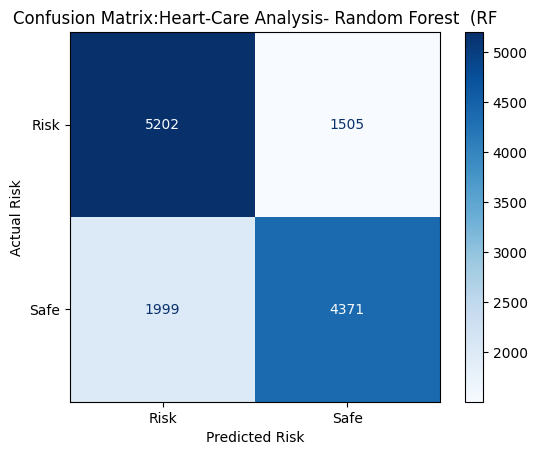

In [ ]:
def checkAccuracy(y_pred,y_test):
  print('Performance Metrics')
  acc_score=accuracy_score(y_test,y_pred)

  pre_Score=precision_score(y_test,y_pred,average='weighted')

  rec_score=recall_score(y_test,y_pred,average='weighted')

  f_score=f1_score(y_test,y_pred,average='weighted')

  model_score_test = round(best_model_XG.score(X_test_scalled, y_test) * 100, 2)
  model_score_train = round(best_model_XG.score(X_train_scalled, y_train) * 100, 2)




  # add in to the dictionary
  m_table=[["Model Train Score",model_score_train],["Model Test Score",model_score_test],["Accuracy Score",round(acc_score*100,2)],["Percision Score",round(pre_Score*100,2)],["Recall Score",round(rec_score*100,2)],["F_Score          ",round(f_score*100,2)]]
  print(tabulate(m_table, headers=["Metric", "Score (%)"], tablefmt="pretty"))
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))
  dict_model_score_train['XG']=model_score_train
  dict_model_score_test['XG']=model_score_test
  dict_acc_score["XG"]=round(acc_score*100,2)
  dict_percision_score['XG']=round(pre_Score*100,2)
  dict_recall_score['XG']=round(rec_score*100,2)
  dict_f1_score['XG']=round(f_score*100,2)

  #confusion matrix
  cm=confusion_matrix(y_test,y_pred)
  display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Risk','Safe'])
  display.plot(cmap=plt.cm.Blues)
  plt.title('Confusion Matrix:Heart-Care Analysis- Random Forest  (RF')
  plt.xlabel('Predicted Risk')
  plt.ylabel('Actual Risk')
  plt.show()
checkAccuracy(y_pred,y_test)

In [ ]:
Train_Score["XG"] = 74.61
Test_Score["XG"] =  73.2
Accuracy_Score["XG"]= 73.2
Percision_Score["XG"] = 73.27
Recall_Score["XG"] = 73.2
F_Score["XG"] =  73.14

LGBM

In [ ]:
def hyperopt_lgb_score(params):
    clf = LGBMClassifier(**params)
    current_score = cross_val_score(clf, X_train_scalled, y_train, cv=10).mean()
    print(current_score, params)
    return current_score

space_lgb = {
            'learning_rate': hp.quniform('learning_rate', 0, 0.05, 0.0001),
            'n_estimators': hp.choice('n_estimators', range(100, 1000)),
            'max_depth':  hp.choice('max_depth', np.arange(2, 12, dtype=int)),
            'num_leaves': hp.choice('num_leaves', 2*np.arange(2, 2**11, dtype=int)),
            'min_child_weight': hp.quniform('min_child_weight', 1, 9, 0.025),
            'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.005),
            'objective': 'binary',
            'boosting_type': 'gbdt',
            }

best = fmin(fn=hyperopt_lgb_score, space=space_lgb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
params = space_eval(space_lgb, best)
params

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.885,
 'learning_rate': 0.00030000000000000003,
 'max_depth': 3,
 'min_child_weight': 5.75,
 'n_estimators': 121,
 'num_leaves': 3314,
 'objective': 'binary'}

In [ ]:
LGB_Classifier = LGBMClassifier(**params)
LGB_Classifier.fit(X_train_scalled, y_train)


[LightGBM] [Info] Number of positive: 25752, number of negative: 26552
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 52304, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492352 -> initscore=-0.030593
[LightGBM] [Info] Start training from score -0.030593
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMClassifier(colsample_bytree=0.885, learning_rate=0.00030000000000000003,
               max_depth=3, min_child_weight=5.75, n_estimators=121,
               num_leaves=3314, objective='binary')

In [ ]:
y_pred = LGB_Classifier.predict(X_test_scalled)

Performance Metrics
+-------------------+-----------+
|      Metric       | Score (%) |
+-------------------+-----------+
| Model Train Score |   69.97   |
| Model Test Score  |   70.15   |
|  Accuracy Score   |   70.15   |
|  Percision Score  |   73.64   |
|   Recall Score    |   70.15   |
|      F_Score      |   68.75   |
+-------------------+-----------+

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.90      0.76      6707
           1       0.83      0.49      0.62      6370

    accuracy                           0.70     13077
   macro avg       0.74      0.70      0.69     13077
weighted avg       0.74      0.70      0.69     13077



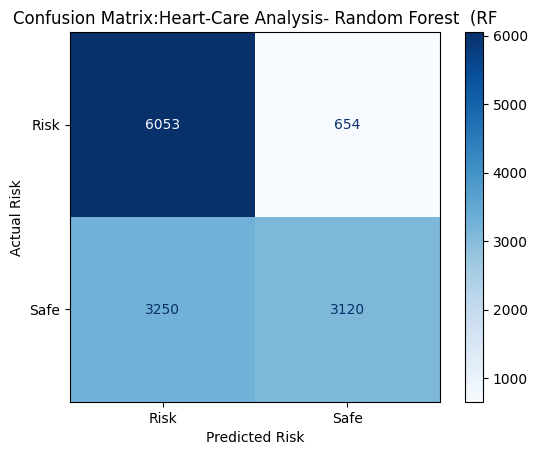

In [ ]:
def checkAccuracy(y_pred,y_test):
  print('Performance Metrics')
  acc_score=accuracy_score(y_test,y_pred)

  pre_Score=precision_score(y_test,y_pred,average='weighted')

  rec_score=recall_score(y_test,y_pred,average='weighted')

  f_score=f1_score(y_test,y_pred,average='weighted')

  model_score_test = round(LGB_Classifier.score(X_test_scalled, y_test) * 100, 2)
  model_score_train = round(LGB_Classifier.score(X_train_scalled, y_train) * 100, 2)




  # add in to the dictionary
  m_table=[["Model Train Score",model_score_train],["Model Test Score",model_score_test],["Accuracy Score",round(acc_score*100,2)],["Percision Score",round(pre_Score*100,2)],["Recall Score",round(rec_score*100,2)],["F_Score          ",round(f_score*100,2)]]
  print(tabulate(m_table, headers=["Metric", "Score (%)"], tablefmt="pretty"))
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))
  dict_model_score_train['LGB']=model_score_train
  dict_model_score_test['LGB']=model_score_test
  dict_acc_score["LGB"]=round(acc_score*100,2)
  dict_percision_score['LGB']=round(pre_Score*100,2)
  dict_recall_score['LGB']=round(rec_score*100,2)
  dict_f1_score['LGB']=round(f_score*100,2)

  #confusion matrix
  cm=confusion_matrix(y_test,y_pred)
  display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Risk','Safe'])
  display.plot(cmap=plt.cm.Blues)
  plt.title('Confusion Matrix:Heart-Care Analysis- Random Forest  (RF')
  plt.xlabel('Predicted Risk')
  plt.ylabel('Actual Risk')
  plt.show()
checkAccuracy(y_pred,y_test)

## **Add Classification Scores to Score Dictionary **

In [ ]:
Train_Score["LGB"] = 82.97
Test_Score["LGB"] =  72.23
Accuracy_Score["LGB"]= 72.23
Percision_Score["LGB"] = 72.3
Recall_Score["LGB"] = 72.23
F_Score["LGB"] = 72.17

In [ ]:
# Emsemble Model Score

In [ ]:
Train_Score["EM"] = 74.76
Test_Score["EM"] =  73.11
Accuracy_Score["EM"]= 73.11
Percision_Score["EM"] = 73.21
Recall_Score["EM"] = 73.11
F_Score["EM"] = 73.04

In [ ]:
Train_Score["Tab"] = 80.12
Test_Score["Tab"] =  79.54
Accuracy_Score["Tab"]= 73.39
Percision_Score["Tab"] = 73.61
Recall_Score["Tab"] = 73.39
F_Score["Tab"] = 73.26

In [ ]:
Train_Score["ANN"] = 73.55
Test_Score["ANN"] =  73.4
Accuracy_Score["ANN"]= 73
Percision_Score["ANN"] = 73
Recall_Score["ANN"] = 73
F_Score["ANN"] = 73.2

In [ ]:
keys = list(Train_Score.keys())
train_values = list(Train_Score.values())
test_values = list(Test_Score.values())
accuracy_values = list(Accuracy_Score.values())
precision_values = list(Percision_Score.values())
recall_values = list(Recall_Score.values())
fscore_values = list(F_Score.values())

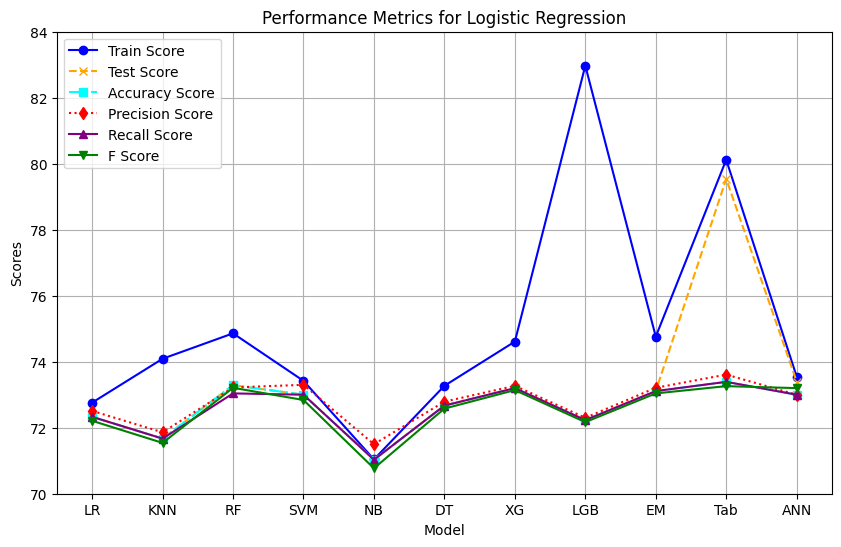

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(keys, train_values, marker='o', linestyle='-', label='Train Score', color='blue')
plt.plot(keys, test_values, marker='x', linestyle='--', label='Test Score', color='orange')
plt.plot(keys, accuracy_values, marker='s', linestyle='-.', label='Accuracy Score', color='cyan')
plt.plot(keys, precision_values, marker='d', linestyle=':', label='Precision Score', color='red')
plt.plot(keys, recall_values, marker='^', linestyle='-', label='Recall Score', color='purple')
plt.plot(keys, fscore_values, marker='v', linestyle='-', label='F Score', color='green')


plt.title('Model Performance Metrics ')
plt.xlabel('Model Key')
plt.ylabel('Scores')
plt.ylim(70,80)

# Add titles and labels
plt.title('Performance Metrics for Logistic Regression')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.ylim(70,84)
plt.grid(True)
plt.legend()
plt.show()

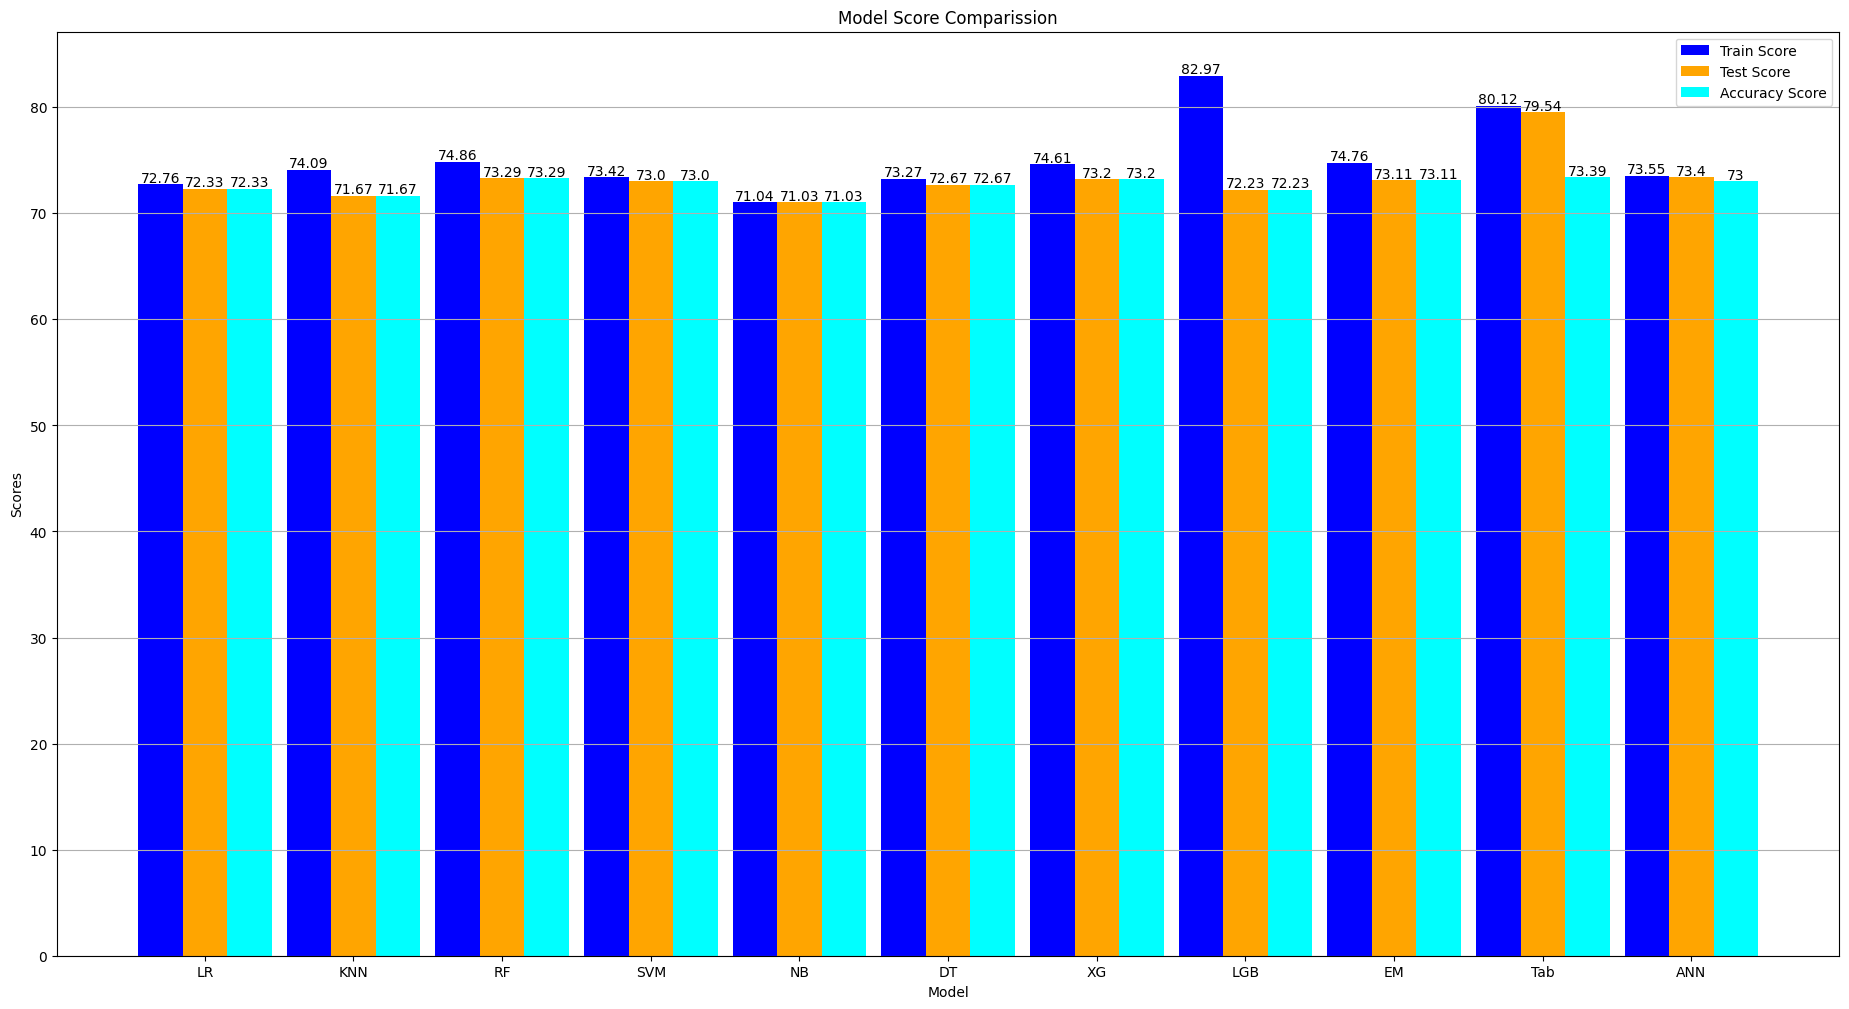

In [ ]:
#bar chart

# Set up the bar width
bar_width =0.3

# Set the positions of the bars on the x-axis
r1 = np.arange(len(keys))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.figure(figsize=(23, 12))

# Plot bars for train, test, and accuracy values
plt.bar(r1, train_values, color='blue', width=bar_width, label='Train Score')
plt.bar(r2, test_values, color='orange', width=bar_width, label='Test Score')
plt.bar(r3, accuracy_values, color='cyan', width=bar_width, label='Accuracy Score')

# Add labels on top of the bars
for i in range(len(r1)):
    plt.text(r1[i], train_values[i] + 0.2, str(train_values[i]), ha='center', color='black')
    plt.text(r2[i], test_values[i] + 0.2, str(test_values[i]), ha='center', color='black')
    plt.text(r3[i], accuracy_values[i] + 0.2, str(accuracy_values[i]), ha='center', color='black')

# Add titles and labels
plt.title('Model Score Comparission')
plt.xlabel('Model')
plt.ylabel('Scores')

# Add x-ticks on the middle of the group bars
plt.xticks([r + bar_width for r in range(len(keys))], keys)

# Add grid and legend
plt.grid(True, axis='y')
plt.legend()

# Show the plot
plt.show()
